## 1 Monte-Carlo Simulation
Submission by Dominique Cheray & Jacqueline Wagner

In [1]:
import random
import math
import numpy as np
import matplotlib.pyplot as plt

### 1.1 Data Creation and Visualization

Transformation formula for $p(Y=0)=p(Y=1)= 1/2$:
$$
Y = \begin{cases} 0 &if  x  <= 0.5 \\ 1 &else \end{cases} 
$$
Transformation formula for $p(X|Y=0) = 2 - 2x$:
$$
X = 1 - \sqrt{1-x}
$$
Tranformation formula for $p(X|Y=1) = 2x$:
$$
X = \sqrt{x}
$$

In [2]:
def create_data(N):
    features = []
    labels = []
    random.seed()
    for i in range(0, N):
        rawY = random.random()
        rawX = random.random()
        if rawY <= 0.5:
            Y = 0
            X = 1 - math.sqrt(1-rawX)
        else:
            Y = 1
            X = math.sqrt(rawX)
        features.append(X)
        labels.append(Y)
    return features, labels

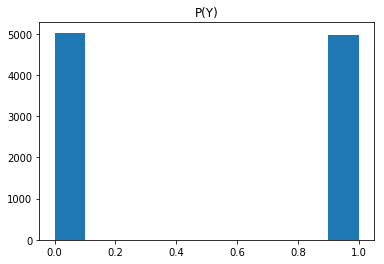

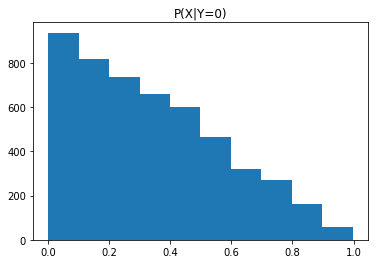

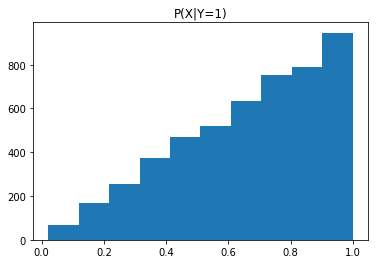

In [3]:
features, labels = create_data(10000)
plt.hist(labels)
plt.title('P(Y)')
plt.show()

xOnes = []
xZeros = []
for i in range(0, len(features)):
    if labels[i] == 0:
        xZeros.append(features[i])
    else:
        xOnes.append(features[i])
plt.hist(xZeros)
plt.title('P(X|Y=0)')
plt.show()

plt.hist(xOnes)
plt.title('P(X|Y=1)')
plt.show()

### 1.2 Classification by Thresholding

In [4]:
# helper method to calculate classification error
def calculate_error(predicted_labels, true_labels):
    error = 0
    for i in range(0, len(predicted_labels)):
        if predicted_labels[i] != true_labels[i]:
            error = error + 1
    error = error / len(predicted_labels)
    return error

In [5]:
# classification rule A
def rule_a(t, features):
    predictedLabels = []
    for i in features:
        if i <= t:
            predictedLabels.append(0)
        else:
            predictedLabels.append(1)
    return predictedLabels

# classification rule B
def rule_b(t, features):
    predictedLabels = []
    for i in features:
        if i <= t:
            predictedLabels.append(1)
        else:
            predictedLabels.append(0)
    return predictedLabels

# calculate the error for rule A with a given t
def calc_error_rule_a(t):
    return 0.25 + (t - 0.5)**2

# calculate the error for rule B with a given t
def calc_error_rule_b(t):
    return 0.75 - (t - 0.5)**2

# test if the classification rule A performs as predicted with given t and testsetsize
# test is performed 10 times and mean and standard deviation of the error are printed
def test_classification_rule_a(t, testset_size):
    errors = []
    for i in range(10):
        # for eacht of the 10 repetitions create a testset
        features, labels = create_data(testset_size)
        # classify the testset according to rule A
        predicted_labels = rule_a(t, features)
        # calculate the classification error for this repetition and put it in the array for all errors
        errors.append(calculate_error(predicted_labels, labels))
    error_predicted = calc_error_rule_a(t)
    mean_error = np.mean(errors)
    std_error = np.std(errors)
    print('t: ' + str(t) + ' N: ' + str(testset_size) + ' Error predicted: ' + str(error_predicted) + ' Mean error: ' +
          str(mean_error) + ' Standard deviation of error: ' + str(std_error))

# test if the classification rule B performs as predicted with given t and testsetsize
# test is performed 10 times and mean and standard deviation of the error are printed
def test_classification_rule_b(t, testset_size):
    errors = []
    for i in range(0, 10):
        # for each of the 10 repetitions create a testset
        features, labels = create_data(testset_size)
        # classifiy the testset according to rule B
        predicted_labels = rule_b(t, features)
        # calculate the classification error for this repetition and put it in the array for all errors
        errors.append(calculate_error(predicted_labels, labels))
    error_predicted = calc_error_rule_b(t)
    mean_error = np.mean(errors)
    std_error = np.std(errors)
    print('t: ' + str(t) + ' N: ' + str(testset_size) + ' Error predicted: ' + str(error_predicted) + ' Mean error: ' +
          str(mean_error) + ' Standard deviation: ' + str(std_error))

In [6]:
print('Rule A:')
test_classification_rule_a(0.2, 10)
test_classification_rule_a(0.2, 100)
test_classification_rule_a(0.2, 1000)
test_classification_rule_a(0.2, 10000)
print()
test_classification_rule_a(0.5, 10)
test_classification_rule_a(0.5, 100)
test_classification_rule_a(0.5, 1000)
test_classification_rule_a(0.5, 10000)
print()
test_classification_rule_a(0.6, 10)
test_classification_rule_a(0.6, 100)
test_classification_rule_a(0.6, 1000)
test_classification_rule_a(0.6, 10000)
print()
print()
print('Rule B:')
test_classification_rule_b(0.2, 10)
test_classification_rule_b(0.2, 100)
test_classification_rule_b(0.2, 1000)
test_classification_rule_b(0.2, 10000)
print()
test_classification_rule_b(0.5, 10)
test_classification_rule_b(0.5, 100)
test_classification_rule_b(0.5, 1000)
test_classification_rule_b(0.5, 10000)
print()
test_classification_rule_b(0.6, 10)
test_classification_rule_b(0.6, 100)
test_classification_rule_b(0.6, 1000)
test_classification_rule_b(0.6, 10000)

Rule A:
t: 0.2 N: 10 Error predicted: 0.33999999999999997 Mean error: 0.38 Standard deviation of error: 0.166132477258
t: 0.2 N: 100 Error predicted: 0.33999999999999997 Mean error: 0.321 Standard deviation of error: 0.0559374650838
t: 0.2 N: 1000 Error predicted: 0.33999999999999997 Mean error: 0.3398 Standard deviation of error: 0.014749915254
t: 0.2 N: 10000 Error predicted: 0.33999999999999997 Mean error: 0.34075 Standard deviation of error: 0.00305982025616

t: 0.5 N: 10 Error predicted: 0.25 Mean error: 0.21 Standard deviation of error: 0.137477270849
t: 0.5 N: 100 Error predicted: 0.25 Mean error: 0.262 Standard deviation of error: 0.033406586177
t: 0.5 N: 1000 Error predicted: 0.25 Mean error: 0.2505 Standard deviation of error: 0.0116038786619
t: 0.5 N: 10000 Error predicted: 0.25 Mean error: 0.24871 Standard deviation of error: 0.00424816430944

t: 0.6 N: 10 Error predicted: 0.26 Mean error: 0.27 Standard deviation of error: 0.09
t: 0.6 N: 100 Error predicted: 0.26 Mean error

The standard deviation of the error decreases logarithmically with increasing N.

### 1.3 Nearest Neighbor Classification

In [7]:
# create a training set with one instance of each of the two classes
def create_nn_training_data():
    # create a training set with two instances
    nn_features, nn_labels = create_data(2)
    # make sure there is one instance of each class
    # if not create a new testset with two instances
    # repeat this until you have one instance of each of the two classes
    while nn_labels[0] == nn_labels[1]:
        nn_features, nn_labels = create_data(2)
    return nn_features, nn_labels

# NN classifier: given a trainingset with two instances and the corresponding annotations
# and a test set predict the classes of the testset instances
def nn_classifier(training_features, training_labels, test_features):
    predicted_labels = []
    for i in range(0, len(test_features)):
        #calculate the distances of the test instance to the trainig instances
        distZero = abs(training_features[0] - test_features[i])
        distOne = abs(training_features[1] - test_features[i])
        # class of the test instance is the class of the nearest trainig instance
        if distZero <= distOne:
            predicted_labels.append(training_labels[0])
        else:
            predicted_labels.append(training_labels[1])
    return predicted_labels

# Use the NN classifier from above 100 times and report mean error of classifier
def classify():
    errors = []
    for i in range(0, 100):
        # for each fo the 100 repetitions create the trainingset with one instance of each of the two classes
        training_features, training_labels = create_nn_training_data()
        # create a sufficiently large testset
        test_features, test_labels = create_data(100000)
        # predict the classes of the training instances
        predicted_labels = nn_classifier(training_features, training_labels, test_features)
        # calculate the classification error of this repetition and put it in the array for all errors
        errors.append(calculate_error(predicted_labels, test_labels))
    print('Mean error: ' + str(np.mean(errors)))

In [10]:
classify()

Mean error: 0.356215
